# Comparing statistics to Python

The purpose of this notebook is to generate a few comparison statistics for time using `networkx`'s implementation of finding maximal independent sets.

In [12]:
from collections import Counter
from itertools import repeat
import multiprocessing as mp

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.approximation.independent_set import maximum_independent_set
import pandas as pd

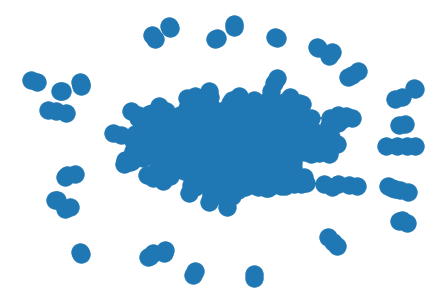

1000
864


In [16]:
# Read the network
# infile = "examples/test_edgelist.txt"
infile = "examples/gnm_edgelist.txt"

g = nx.read_edgelist(infile)
nx.draw(g)
plt.show()


In [24]:
print(f"The maximum independent set calculated has a size of: {len(maximum_independent_set(g))}")

{'134', '690', '52', '272', '538', '650', '181', '449', '194', '27', '42', '55', '14', '2', '143', '299', '72', '393', '336', '778', '681', '771', '815', '300', '71', '817', '178', '154', '32', '476', '579', '827', '230', '169', '514', '34', '697', '110', '329', '875', '365', '271', '236', '442', '942', '791', '183', '43', '227', '63', '896', '809', '665', '172', '861', '263', '702', '151', '570', '491', '434', '714', '260', '378', '45', '914', '388', '443', '591', '575', '102', '611', '273', '637', '216', '515', '122', '905', '213', '180', '569', '77', '925', '337', '15', '307', '972', '461', '57', '456', '25', '446', '83', '583', '897', '108', '28', '283', '990', '166', '163', '343', '291', '522', '6', '129', '220', '716', '654', '74', '160', '892', '221', '384', '121', '761', '727', '510', '125', '630', '717', '155', '249', '176', '474', '436', '98', '416', '231', '486', '244', '949', '146', '566', '383', '47', '86', '7', '631', '5', '973', '404', '345', '94', '408', '402', '170', '

In [23]:
%%time

# Compare to the same number of iterations using Python

def job(g):
    x = nx.maximal_independent_set(g)
    return len(x)

n = 1_000_000

with mp.Pool(4) as p:
    data = p.map(job, repeat(g, n))
    
print(max(data))
print(min(data))

434
386
CPU times: user 55.6 ms, sys: 56.1 ms, total: 112 ms
Wall time: 18.8 s
